# sklearn チートシート

In [1]:
import sklearn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

## @ preprocessing.LabelEncoder()
### le.fit("文字列")
### le.transform("文字列")
### le.fit_transform("文字列")


文字データを離散の数値に変換する

In [3]:
from sklearn.preprocessing import LabelEncoder
week_breakfast = ["パン","ご飯","なし","パン","シリアル","なし","なし"]
le = LabelEncoder()
labels = le.fit_transform(week_breakfast)
labels

array([3, 0, 1, 3, 2, 1, 1], dtype=int64)

## @ from sklearn.model_selection import  KFold
### folds = KFold(n_splits=n_fold, shuffle=True, random_state=11)
k交差分割検証　n_splitで分割数, shuffleで単純なグループ分けから、毎回ランダムなデータを取ってくる

## @ from sklearn impor datasets
### iris=datasets.load_iris()        data=iris.data label=iris.target
有名なデータセットのダウンロードをできる。特徴量はdata　正解ラベルはtargetでアクセスできる

In [38]:
from sklearn import datasets
iris=datasets.load_iris()
print(iris.data[:5])
print(iris.target[:5])
print(iris['data'][:5])
print(iris['target'][:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


## @ from sklearn.model_selection import train_test_split
### X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
学習データを訓練データとテストテストデータに分ける

In [39]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
print(X.shape)
print(y.shape)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

print(X_train.shape)
print(y_train.shape)

(150, 4)
(150,)
(105, 4)
(105,)


## @ from sklearn.preprocessing import StandardScaler
### sc=StandardScaler()  X_std=sc.fit_transform(X)
データを標準化する。 fit(X) transform(X)をfit_transorm(X)だけでかける


In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)

X_test_std=sc.transform(X_test)

print(X_train_std.mean())
print(X_train_std.std())

print(X_test_std.mean())
print(X_test_std.std())

3.6795963101862333e-16
0.9999999999999999
-0.08700211457774676
0.9071408118354307


## @ from sklearn.linear_model import Perceptron
### ppn=Perceptron(eta0=0.1,random_state=0,shuffle=True)
単純パーセプトロン　ハイパーパラメータは学習係数eta　shuffle=Trueで各epochごとにデータをシャッフルする

## @ from sklearn.metrics import accuracy_score
### accuracy_score(y_test,y_pred)
正解ラベルと予測ラベルから正解率を求める

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

ppn=Perceptron(eta0=0.1,random_state=0,shuffle=True)
ppn.fit(X_train_std,y_train)
y_pred=ppn.predict(X_test_std)

# accuracy_scoreを使う場合
print("Accuracy: %.2f" % accuracy_score(y_test,y_pred))

# modelのscoreメソッドを使う場合
print("Accuracy: %.2f" % ppn.score(X_test_std,y_test))

Accuracy: 0.93
Accuracy: 0.93


## @ from sklearn.linear_model import LogisticRegression
### lr=LogisticRegression(C=0.01,random_state=0,penalty='l2')
ロジスティック回帰　ハイパーパラメータCは正則項の逆数で、Cが小さいほど正則化は強くなる  
penaltyでL1,L2,ElasticNetを選択できる。デフォルトはl2


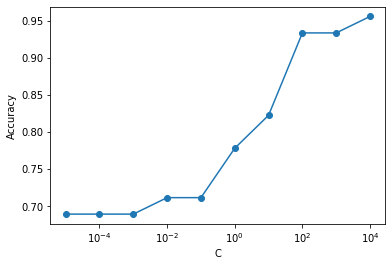

In [33]:
from sklearn.linear_model import LogisticRegression


accuracy=[]
params=[]
for c in range(-5,5):
    lr=LogisticRegression(C=10**c,random_state=0)
    lr.fit(X_train_std,y_train)
    accuracy.append(lr.score(X_test_std,y_test))
    params.append(10**c)

plt.plot(params,accuracy,marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()


## @ from sklearn.svm import SVC
### svm=SVC(kernel='linear',C=1.0,random_state=0)
### svm=SVC(kernel='rbf',gammma=10,C=1.0,random_state=0)
サポートベクターマシン。kernel='linear'で線形分離、kernel='rbf'で非線形分離を行なう。Cはスラック変数の係数、gammmaカーネル関数の係数  
正則化項はL2正則化のみ

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

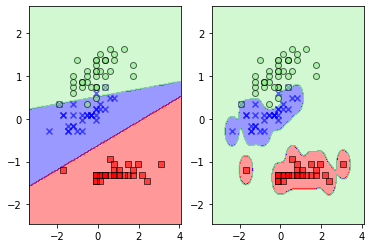

In [81]:
from sklearn.svm import SVC

plt.subplot(1,2,1)
svm=SVC(kernel='linear',C=1.0,random_state=0)
svm.fit(X_train_std[:,[1,3]],y_train)
plot_decision_regions(X_train_std[:,[1,3]],y_train,classifier=svm)

plt.subplot(1,2,2)
svm=SVC(kernel='rbf',C=10.0,gamma=15,random_state=0)
svm.fit(X_train_std[:,[1,3]],y_train)
plot_decision_regions(X_train_std[:,[1,3]],y_train,classifier=svm)
plt.show()

## @ from sklearn.svm import linearSVC
### liSVM=LinearSVC(penalty='l1',C=10,dual=False)
SVMの強化版？L1正則化を設定できるようになった

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


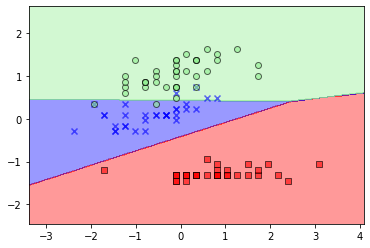

In [8]:
from sklearn.svm import LinearSVC
liSVM=LinearSVC(penalty='l1',C=10,dual=False)
liSVM.fit(X_train_std[:,[1,3]],y_train)
plot_decision_regions(X_train_std[:,[1,3]],y_train,classifier=liSVM)
plt.show()

## 実験　L1正則化の重み減少の様子

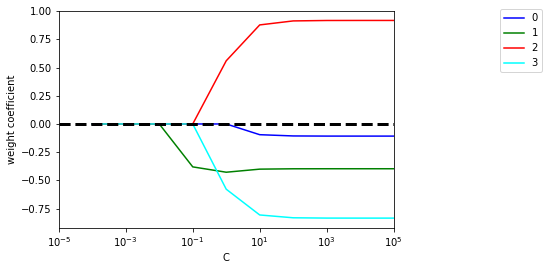

In [16]:
fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LinearSVC(penalty='l1', C=10.**c,dual=False, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=column,
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

## @ from sklearn.tree import DecisionTreeClassifier
### tree=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
決定木一つ。criterionが不順度の指標'gini'か'entropy'。max_depthが決定木の深さ。  
決定木で学習する訓練データは特徴量をスケーリングする必要がない（してもいいが、数値の分割条件の大小関係が重要なので、しきい値が変わるだけ）

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


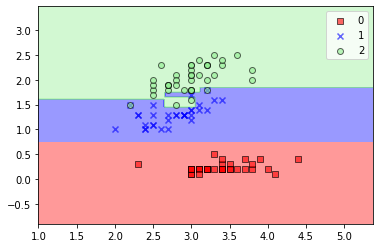

In [94]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy',max_depth=20,random_state=0)
tree.fit(X_train[:,[1,3]],y_train)
plot_decision_regions(X_train[:,[1,3]],y_train,classifier=tree)
plt.legend()
plt.show()

## @ from sklearn.ensemble import RandomForestClassifier
### forest=RandomForestClassifier(criterion='entropy',n_estimators=10,random_state=2)
ランダムフォレスト。criterionが不順度の指標'gini'か'entropy'　n_estimatorsが決定木の数。n_jobsがPCの複数コアでの並列処理をしている。   
### importance=forest.feature_importances_
### indices=np.argsort(importances)[::-1]
ランダムフォレストで重要な特徴量を識別する。配列を返す。決定木から計算された不順度の平均的な減少量として重要度を測定できる  
indicesで重要な特徴量のインデックス番号を取得する

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


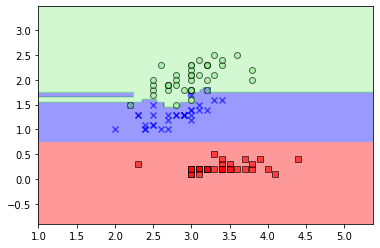

test accuracy 0.93
[0.14334485 0.0264803  0.40058315 0.42959169]


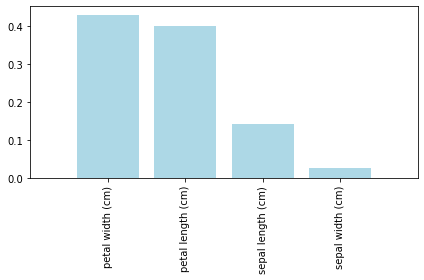

In [26]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestでの2変数での分類の可視化
forest=RandomForestClassifier(criterion='gini',n_estimators=10,random_state=0,n_jobs=2)
forest.fit(X_train[:,[1,3]],y_train)
plot_decision_regions(X_train[:,[1,3]],y_train,classifier=forest)
plt.show()
print("test accuracy %.2f" %forest.score(X_test[:,[1,3]],y_test))

# RandomForestで重要な特徴量を識別
forest=RandomForestClassifier(criterion='gini',n_estimators=10,random_state=0,n_jobs=2)
forest.fit(X_train,y_train)
importaces=forest.feature_importances_
print(importaces)
indices=np.argsort(importaces)[::-1]
feat_labels=np.array(iris['feature_names'])

plt.bar(range(X_train.shape[1]),importaces[indices],color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()


## @ from sklearn.feature_selection import SelectFromModel
### sfm=SelectFromModel(estimator=forest,prefit=True,threshold=0.15)
### X_selected=sfm.transform(X_train)
識別機(多くの場合ランダムフォレスト)が分類したしきい値thereshold以上の重要な特徴量のみを取得する 
### mask=sfm.get_support()
### importance=feat_label[mask]
get_support()メソッドで、しきい値以上の特徴量のbool配列を返す

In [35]:
from sklearn.feature_selection import SelectFromModel
sfm=SelectFromModel(estimator=forest,threshold=0.15,prefit=True)
print(X_train[:3])
X_selected=sfm.transform(X_train)
print(X_selected[:3])

mask=sfm.get_support()
print(feat_labels[mask])

[[5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]]
[[3.5 1. ]
 [5.5 1.8]
 [5.7 2.5]]
['petal length (cm)' 'petal width (cm)']


## @ from sklearn.neighbors import KNeighborsClassifier
### knn=KNeighborsClassifer(n_neightbors=5,p=2,metric='minkowski')
K近傍法(k-nearest-neighbor) n_negibors分類したいサンプルの最近傍のデータ数 k(デフォルトは5)、pはminkowski距離を用いる場合の次元を表す。  
p=2でユークリッド距離に対応する  
minkowski距離はユークリッド距離とマンハッタン距離を一般化した距離指標  
k-nearest-neighborは訓練データの中から分類したいデータ点に最も近いk個のサンプルを見つけ出し、k個の最近傍の多数決で決まる。  
そのため、データを保存しておく必要があり、メモリ問題が起きる場合がある。

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


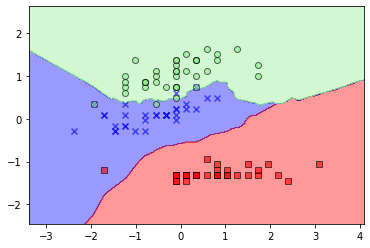

test accuracy 0.80


In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')
knn.fit(X_train_std[:,[1,3]],y_train)
plot_decision_regions(X_train_std[:,[1,3]],y_train,classifier=knn)
plt.show()
print("test accuracy %.2f" %knn.score(X_test_std[:,[1,3]],y_test))

## @ from sklearn.preprcessing import Imputer
### imr=Imputer(missing_value='NaN',strategy='mean',axis=1)
### imputed_data=imr.fit_transform(df.values)
欠損値補完。pandas のdf.fillna(df.mean())に対応する
strategyはmedian,mean,most_frequent

## @ from skleran.preprocessing import LabelEncoder
### le=LabelEncoder()
### y=le.fit_transform(df['classlabel'].values)
カテゴリ特徴量を数字データに変換。正解クラスを数値化するのに便利。  
順序特徴量の場合は、特徴量に大小関係がない場合は、不要な大小関係を与えてしまうのでone-hot エンコーディングを用いる

In [140]:
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
print(df)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['classlabel']=le.fit_transform(df['classlabel'])
df['size']=le.fit_transform(df['size'])
df['color']=le.fit_transform(df['color'])

print(df)

   color size  price classlabel
0  green    M   10.1     class1
1    red    L   13.5     class2
2   blue   XL   15.3     class1
   color  size  price  classlabel
0      1     1   10.1           0
1      2     0   13.5           1
2      0     2   15.3           0


## @ from sklearn.preprocessing import  OneHotEncoder
### ohe=OneHotEncoder(categorical_feature=[0])
### ohe.fit_transform(X).toarray()
OneHotエンコーディングを名義特徴量に対して行ってくれる。categorical_feaures=[0]でdummy変数を作る列を指定  
変換するにはnumpy配列にしないといけないので注意。toarray()でnumpy配列にしないとインスタンスのままになる  
変換する配列中に指定した列以外に文字変数が含まれるとエラーを吐くので注意

In [143]:
X=df[['color','size','price']].values
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  0. , 13.5],
       [ 1. ,  0. ,  0. ,  2. , 15.3]])

### 参考　pandasでのdummy変数の作り方
### pd.get_dummies(df)

## @ from sklearn.preprocessing import MinMaxScaler
### mms=MinMaxScaler()
### X_train_mms=mms.fit_transform(X_train)
[0,1]の間に特徴量を収める正規化。標準化はStandardScalerなので注意する
※from sklearn.preprcessing import StandarScaler

In [148]:
from sklearn.preprocessing import MinMaxScaler
print(X_train.max(),X_train.min())
mms=MinMaxScaler()
X_train_mms=mms.fit_transform(X_train)
print(X_train_mms.max(),X_train_mms.min())

7.9 0.1
1.0 0.0


## @ from sklearn.decomposition import PCA
### pca=PCA(n_components=2)  pca.fit(X_train_std)  
### pca.transform(X_train_std) pca.transform(X_test_std)
PCAを超簡単に行なうクラス。n_componentsに選択する特徴量の数を指定。Noneにすると、pca.explained_variance_ratio_ですべての固有値の分散説明率にアクセスできる。
### PCAでは必ず標準化させたデータを用いる

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


std before: 1.9993565291393742
std after: 0.9999999999999999
pca before: (105, 4)
pca after: (105, 2)


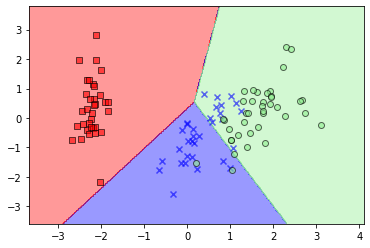

train accuracy with pca:0.87
test accuracy with pca:0.87
train accuracy with std:0.92
test accuracy with std:0.82


array([0.71806894, 0.24442204, 0.0333455 , 0.00416351])

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 必ずPCAにかけるデータは標準化させる
print("std before:",X_train.std())
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)
print("std after:",X_train_std.std())

print("pca before:",X_train_std.shape)
pca=PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)
print("pca after:",X_train_pca.shape)

# ロジスティック回帰で試してみる
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_pca,y_train)
plot_decision_regions(X_train_pca,y_train,classifier=lr)
plt.show()

#　PCAで過学習は収まったが、テストデータの正解率はむしろ悪くなった..
print("train accuracy with pca:%.2f" % lr.score(X_train_pca,y_train))
print("test accuracy with pca:%.2f" % lr.score(X_test_pca,y_test))

lr.fit(X_train_std,y_train)
print("train accuracy with std:%.2f" % lr.score(X_train_std,y_train))
print("test accuracy with std:%.2f" % lr.score(X_test_std,y_test))

pca=PCA(n_components=None)
pca.fit(X_train_std)
pca.explained_variance_ratio_

## @ from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
### lda=LDA(n_components=2)  X_train_lda=lda.fit_transform(X_train_std,y_train)
次元削減のLDAを簡単に実装。前提条件が  
・データが正規分布に従う  
・クラスの共分散行列が全く同じ  
・特徴量が統計的に互いに独立していること  
なので、使用するには制約が厳しい.満たしてなくても、うまくいくらしい  

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=2)
X_train_lda=lda.fit_transform(X_train_std,y_train)
X_test_lda=lda.transform(X_test_std)
print("lda before:",X_train.shape)
print("lda after:",X_train_lda.shape)

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_lda,y_train)

#　PCAに比べると精度は上がる。
print("train accuracy with lda:%.2f" % lr.score(X_train_lda,y_train))
print("test accuracy with lda:%.2f" % lr.score(X_test_lda,y_test))

lr.fit(X_train,y_train)
print("train accuracy:%.2f" % lr.score(X_train,y_train))
print("test accuracy:%.2f" % lr.score(X_test,y_test))


lda before: (105, 4)
lda after: (105, 2)
train accuracy with lda:0.94
test accuracy with lda:0.84
train accuracy:0.94
test accuracy:0.89


In [57]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')